In [1]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554, as_frame=False) # https://www.openml.org/d/554

Wall time: 16.2 s


In [2]:
type(mnist.data), type(mnist.target)

(numpy.ndarray, numpy.ndarray)

In [3]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

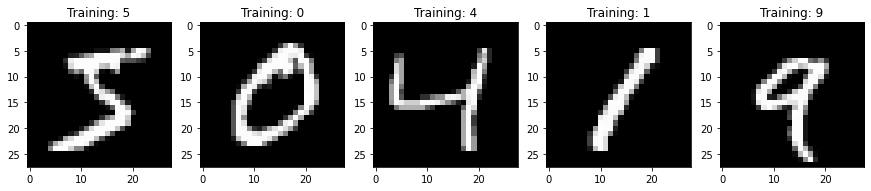

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,3))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 12);

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                    test_size = 1 / 7.0,
                                                    random_state = 0)



In [6]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )
model

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [8]:
%%time
model.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 49 epochs took 212 seconds
Wall time: 3min 31s


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  3.5min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [9]:
model.coef_.shape

(10, 784)

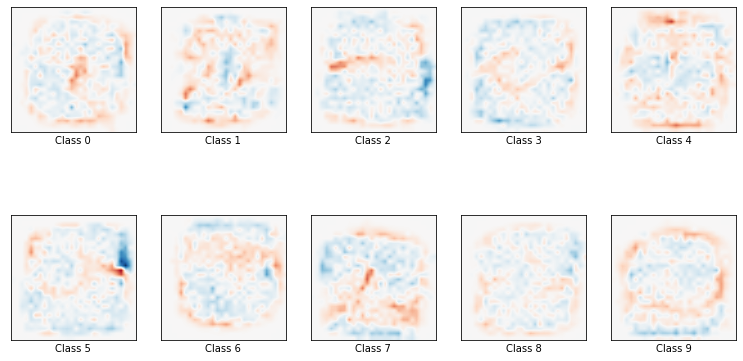

In [10]:
scale = np.abs(model.coef_).max()
plt.figure(figsize=(13,7))

for i in range(10):
    p = plt.subplot(2, 5, i + 1) # 2x5 plot
    p.imshow(model.coef_[i].reshape(28,28), cmap=plt.cm.RdBu,
             vmin=-scale, vmax=scale, interpolation='bilinear')
    p.set_xticks(()) 
    p.set_yticks(())
    p.set_xlabel(f'Class {i}')

In [11]:
model.score(X_train, y_train) # training score

0.9376333333333333

In [12]:
model.score(X_test, y_test) # test score

0.9193

In [13]:
from sklearn import metrics
predictions = model.predict(X_test)
metrics.confusion_matrix(y_true = y_test, 
                         y_pred = predictions, 
                         labels = model.classes_)

array([[ 967,    0,    1,    2,    1,    9,    9,    0,    7,    0],
       [   0, 1114,    5,    3,    1,    5,    0,    4,    7,    2],
       [   3,   13,  931,   18,   12,    1,   15,   10,   34,    3],
       [   1,    5,   33,  894,    0,   26,    2,   12,   27,   13],
       [   1,    2,    5,    1,  897,    1,   11,    9,    7,   28],
       [  10,    2,    6,   29,    9,  747,   17,    6,   30,    7],
       [   7,    3,    6,    0,   11,   18,  939,    1,    4,    0],
       [   2,    5,   13,    2,   12,    2,    1,  982,    4,   41],
       [   4,   17,    9,   18,    6,   25,    9,    2,  861,   12],
       [   4,    5,    6,   10,   35,    7,    2,   31,    8,  861]],
      dtype=int64)

In [14]:
print(np.sign(model.coef_[7]).reshape(28, 28))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1.  1. -1. -1. -1. -1. -1.  0.]
 [ 0.  0. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
   1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [ 0.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
   1.  1.  1.  1.  1.  1. -1. -1. -1. -1.]
 [-1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1

In [15]:
print(X_test[0].reshape(28, 28))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  89.
  147. 147. 249. 230.  59.   2.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  15. 160. 249.
  254. 254. 254. 254. 254. 122.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8. 188. 254. 254.
  254. 250. 147. 166. 253. 251. 120.   0.   0.   0.   0.  

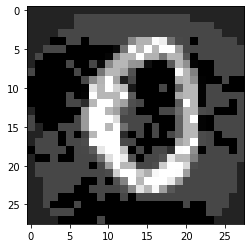

In [16]:
xxx = ((X_test[0] - 50 * np.sign(model.coef_[7]) + 50) * 256 / 356).astype(int)
plt.imshow(xxx.reshape(28,28), cmap=plt.cm.gray)

In [17]:
print(xxx.reshape(28, 28))

[[ 35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35
   35  35  35  35  35  35  35  35  35  35]
 [ 35  35  35  35  35  35  71  71  71  71  71  71  71  71  71  71  71  71
   71  71  71  35  35  35  35  35  35  35]
 [ 35  35  35  35  35  35  71  71  71  71  71  71  71  71  71  71  71  71
   71  71  71  71  71  71  35  35  35  35]
 [ 35  35  35  35  71  71  71  71  71  71  71  71  71  71  71  71  71  71
   71  71  71  71  71  71  71  35  35  35]
 [ 35  35  35   0   0  71  71   0  71  71  71  71  71 135 177 177 250 237
  114  73  71   0  71  71  71  71  71  35]
 [ 35  35  71  71  71   0   0   0   0   0   0  10 115 250 182 254 182 254
  254 159  71  71  71  71  71  71  71  71]
 [ 35  71   0   0   0   0   0   0   0   0   5 135 182 182 254 179 177 119
  181 180  86   0  71  71  71  71  71  71]
 [ 35   0   0   0   0  71   0   0  71  10 135 182 182 148 145  15   0   0
   90 181 143   5   0   0  71  71  71  71]
 [ 71   0   0   0   0   0  71   0   0 117 182 182 163  82   0   

In [18]:
# Adversarial formula. Adds sign of class gradient times some number.
def corrupt_set(x, model, cls, e):
    return ((x  + e * (1 - np.sign(model.coef_[cls])) / 2) * 255 / (255 + e)).astype(int)

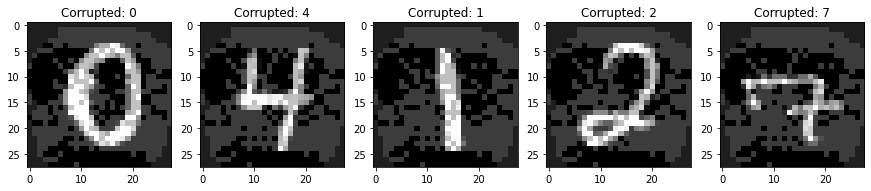

In [19]:
X_test_corrupted = corrupt_set(X_test, model, 7, 80)
plt.figure(figsize=(15,3))
for index, (image, label) in enumerate(zip(X_test_corrupted[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Corrupted: ' + str(label), fontsize = 12);

In [20]:
model.score(X_test_corrupted, y_test) # test score

0.1979

In [21]:
# Adversarial formula. DOES NOT USE SIGN.
def corrupt_set_smooth(x, model, cls, e):
    mn = model.coef_[cls].min()
    mx = model.coef_[cls].max()
    return ((x + e * ((mx - model.coef_[cls]) / (mx - mn) )) * 255 / (255 + e)).astype(int)

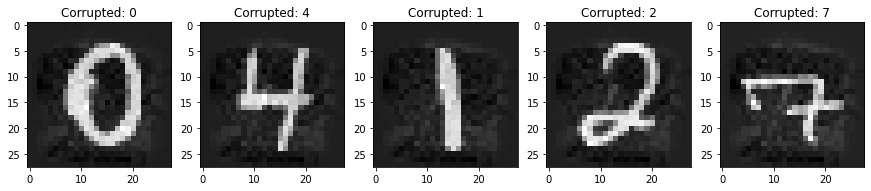

In [22]:
X_test_corrupted_smooth = corrupt_set_smooth(X_test, model, 7, 100)
plt.figure(figsize=(15,3))
for index, (image, label) in enumerate(zip(X_test_corrupted_smooth[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Corrupted: ' + str(label), fontsize = 12);

In [23]:
model.score(X_test_corrupted_smooth, y_test) # test score

0.2272

In [24]:
predictions = model.predict(X_test_corrupted)
metrics.confusion_matrix(y_true = y_test, 
                         y_pred = predictions, 
                         labels = model.classes_)

array([[   7,    0,  480,    0,    0,  504,    5,    0,    0,    0],
       [   0,    0, 1072,    0,    0,   69,    0,    0,    0,    0],
       [   0,    0, 1033,    0,    0,    6,    1,    0,    0,    0],
       [   0,    0,  537,   15,    0,  461,    0,    0,    0,    0],
       [   0,    0,  594,    1,    0,  357,    9,    0,    1,    0],
       [   0,    0,   57,    0,    0,  805,    1,    0,    0,    0],
       [   0,    0,  735,    0,    0,  136,  118,    0,    0,    0],
       [   0,    0,  647,    0,    0,  415,    1,    0,    1,    0],
       [   0,    0,  629,    0,    0,  333,    0,    0,    1,    0],
       [   0,    0,  450,    0,    0,  519,    0,    0,    0,    0]],
      dtype=int64)

In [25]:
predictions = model.predict(X_test_corrupted_smooth)
metrics.confusion_matrix(y_true = y_test, 
                         y_pred = predictions, 
                         labels = model.classes_)

array([[  49,    0,  251,    0,    0,  693,    3,    0,    0,    0],
       [   0,    0,  934,    0,    0,  207,    0,    0,    0,    0],
       [   0,    0, 1021,    0,    0,   19,    0,    0,    0,    0],
       [   0,    0,  244,  305,    0,  464,    0,    0,    0,    0],
       [   0,    0,  404,    2,    0,  551,    3,    0,    2,    0],
       [   0,    0,   27,    0,    0,  836,    0,    0,    0,    0],
       [   0,    0,  634,    0,    0,  316,   39,    0,    0,    0],
       [   0,    0,  463,   83,    0,  517,    0,    0,    1,    0],
       [   0,    0,  380,    0,    0,  562,    0,    0,   21,    0],
       [   0,    0,  284,    9,    0,  668,    0,    0,    7,    1]],
      dtype=int64)